In [ ]:
# From https://github.com/ComputoCienciasUniandes/Examen by Jaime Forero-Romero

# Exercise 3

# Measurements of the horizontal range of a projectile launcher are obtained using airborne imagery.
# Four values are obtained (in meters): 61, 115, 31, 117. Every measurement has an uncertainty of 5 meters.
# The launcher always has the same muzzle speed (between 15 m/s and 60 m/s).
# The different values for the horizontal range are due to different launch angles.
# Use Monte Carlo methods and Bayes' theorem to find the most likely muzzle speed of the projectile launcher
# as new information about the horizontal range is obtained.
# Make a plot that shows the probability of the muzzle speed given the observational data.

### Solution

#### What we know

- Each measurement $R_i$ depends on the muzzle speed $v$ and the launch angle $\theta$.
- The distribution of $R$ for each measurement $R_i$ is normal (gaussian) with $\sigma=5$ m/s.
- Priors are uniform: constant within $\theta=[0,\pi/2]$ and $v=[15,45]$ m/s and zero outside this $\theta,v$ range.

#### What we should do

- We want to find the posterior probability function given all measurements, $P(v\,|\,R_1,...R_N)$
- To do this, we need to write the posterior probability function (for each measurement) $P(v\,|\,R_i)$ in terms of the distribution of $R$ (for that measurement).
- To do this, we must add the probabilities corresponding to all possible launch angles $\theta$ (for each measurement), or in fancier terms we have to marginalize over the nuisance parameter $\theta$. We can do this because all launch angles exclude each other (only one possible angle per launch).

#### Formal procedure

The probability that the projectile was shot with muzzle speed $v$ given that the measured horizontal range was $R_i$ can be calculated by marginalizing over the nuisance parameter $\theta$:
$$
P(v\,|\,R_i)=\int P(v,\theta\,|\,R_i)\,d\theta
$$
Thanks to Bayes' theorem:
$$
P(v,\theta\,|\,R_i)=\frac{P(v,\theta)\,P(R_i\,|\,v,\theta)}{P(R_i)}
$$
Therefore:
$$
P(v\,|\,R_i)=\frac{\int P(v,\theta)\,P(R_i\,|\,v,\theta)\,d\theta}{P(R_i)}
$$
We remember that the prior probability $P(v,\theta)$ is zero outside the intervals $\theta=[0,\pi/2]$ y $v=[15,45]$ m/s and is constant within. Therefore (and within the intervals):
$$
P(v\,|\,R_i)\propto\frac{\int P(R_i\,|\,v,\theta)\,d\theta}{P(R_i)}
$$
On the other hand, $P(R_i\,|\,v,\theta)=\mathcal{N}(R\,|\,R_i,\sigma)$, where $R(\theta)=\frac{v^2}{g}\sin2\theta$:
$$
P(v\,|\,R_i)\propto\frac{\int \mathcal{N}(R(\theta)\,|\,R_i,\sigma)\,d\theta}{P(R_i)}
$$
For $N$ measurements of $R_i$, and keeping in mind that $P(R_i)$ is independent of $v$:
$$
P(v\,|\,R_1,...,R_N)=\prod_{i=1}^NP(v\,|\,R_i)\propto\prod_{i=1}^N\int \mathcal{N}(R(\theta)\,|\,R_i,\sigma)\,d\theta
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# this is the function (normal dist. of R given R_i and sigma) inside each integral, up to the normalization constant
def prob(v,Ri,sig,theta): 
    g=9.8
    R=(v**2/g)*np.sin(2*theta)
    arg=R-Ri
    return np.exp(-0.5*arg**2/sig**2) 

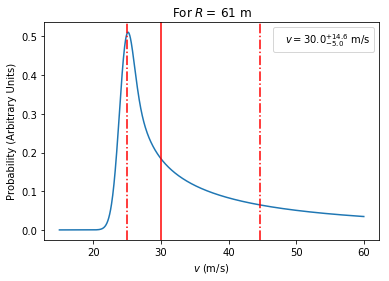

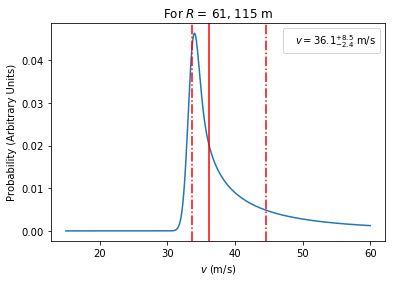

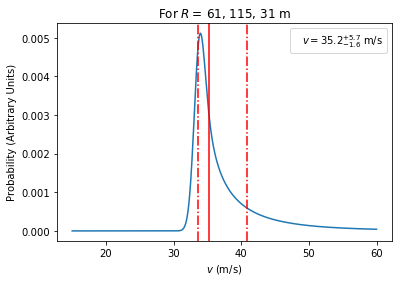

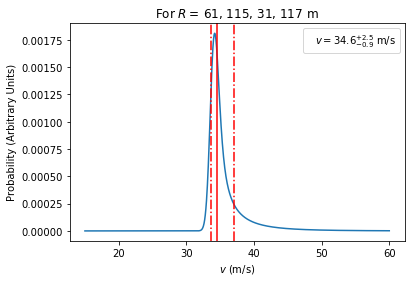

In [12]:
ns=1000
theta=np.linspace(0,np.pi/2,ns) # range according to the prior information on theta
Rarr=[61, 115, 31, 117]
sig=5
pnew=np.ones(ns)
vrange=np.linspace(15,60,ns) # range according to the prior information on v
myst=''
for Ri in Rarr:    
    pind=[np.trapz(prob(v,Ri,sig,theta),theta) for v in vrange] # MC integration not needed
    pnew*=np.array(pind)
    # large sample from posterior to find robust estimators of v and its variance
    samp=np.random.choice(vrange, p=pnew/pnew.sum(),size=100000) 
    median=np.around(np.median(samp),1)
    pc16=np.around(np.percentile(samp,16),1)
    pc84=np.around(np.percentile(samp,84),1)
    plt.plot(vrange,pnew,label=r'$v=%s_{-%s}^{+%s}$ m/s'%(str(median),str(median-pc16),str(pc84-median)))
    plt.axvline(x=pc16, color='r', linestyle='-.')
    plt.axvline(x=pc84, color='r', linestyle='-.')
    plt.axvline(x=median, color='r', linestyle='-')
    plt.xlabel(r'$v$ (m/s)')
    plt.ylabel('Probability (Arbitrary Units)')
    myst+=str(Ri)+', '
    plt.title('For $R=\,$'+myst[:-2]+' m')
    plt.legend( handlelength=0)
    plt.show()